In [21]:
import pandas as pd
import matplotlib.pyplot as plt

res_ = pd.read_csv('Crimenes_filtrado.csv')
back = pd.read_csv('Crimenes_filtrado.csv')

res_['date_column'] = pd.to_datetime(res_['date_column'])

# Convert to days since epoch (1970-01-01)

res_['tiempo'] = (res_['date_column'] - pd.Timestamp("1970-01-01")).dt.days

res_[' dens_pob'] = res_[' dens_pob'].str.replace(",", "", regex=False)
res_[' dens_pob'] = res_[' dens_pob'].astype(float)

res_['dens_pob_bar'] = res_[' dens_pob']*res_['area_km2']
res_

,Unnamed: 0,dens_pob,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,...,latitud,longitud,area_km2,area_ratio,closest_boliche,distance_km,date_column,linear_number,tiempo,dens_pob_bar
0,2,12.4891,julio,SAB,2023-07-01,0,Vialidad,Lesiones por siniestros viales,NO,NO,...,-34.599069,-58.382097,4.512827,0.252113,YOUR CLUB,0.352524,2023-07-01,19539,19539,56.361148
1,10,12.4891,julio,MIE,2023-07-05,6,Vialidad,Lesiones por siniestros viales,NO,NO,...,-34.627486,-58.378501,2.101995,0.117430,RADIO STUDIO,0.490583,2023-07-05,19543,19543,26.252026
2,14,12.4891,julio,LUN,2023-07-03,0,Vialidad,Lesiones por siniestros viales,NO,NO,...,-34.616143,-58.362083,5.029895,0.281000,MOLIERE,0.773775,2023-07-03,19541,19541,62.818857
3,18,12.4891,julio,MIE,2023-07-05,8,Vialidad,Lesiones por siniestros viales,NO,NO,...,-34.600286,-58.382001,2.289008,0.127878,YOUR CLUB,0.255231,2023-07-05,19543,19543,28.587645
4,19,12.4891,julio,VIE,2023-07-07,9,Vialidad,Lesiones por siniestros viales,NO,NO,...,-34.581682,-58.373083,4.512827,0.252113,THE SUB,1.880551,2023-07-07,19545,19545,56.361148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62166,154070,13.7676,diciembre,JUE,2023-12-28,22,Hurto,Hurto total,NO,NO,...,-34.598050,-58.444690,3.615978,0.252866,HOOD JUANA,1.155218,2023-12-28,19719,19719,49.783333
62167,154073,13.7676,febrero,JUE,2023-02-23,7,Robo,Robo total,NO,NO,...,-34.593261,-58.493529,2.122169,0.148403,ONE MORE CLUB,0.836808,2023-02-23,19411,19411,29.217179
62168,154075,13.7676,mayo,MIE,2023-05-31,7,Hurto,Hurto total,NO,NO,...,-34.598818,-58.431260,3.615978,0.252866,VOLT CLUB,0.562664,2023-05-31,19508,19508,49.783333
62169,154076,13.7676,febrero,MAR,2023-02-21,3,Homicidios,Homicidio Doloso,NO,NO,...,-34.587426,-58.454975,3.115707,0.217882,TEATRO VORTERIX,0.893287,2023-02-21,19409,19409,42.895809


In [22]:

res=res_.drop(['date_column','Unnamed: 0','date_column','subtipo',' dens_pob','tiempo','franja','dens_pob_bar','closest_boliche','linear_number','uso_moto','barrio','area_km2','mes','area_ratio','fecha'],axis=1)
res_robo_ = res[(res['tipo'] == 'Robo')]

res_robo = res_robo_[res_robo_['dia'].isin(['SAB', 'DOM'])]
back = res_robo.copy()
res_robo=res_robo.drop(['tipo'],axis=1)
res_robo

,dia,uso_arma,latitud,longitud,distance_km
1198,SAB,SI,-34.584082,-58.378318,1.353616
1200,SAB,NO,-34.581731,-58.381263,1.246719
1205,SAB,SI,-34.581731,-58.381263,1.246719
1208,SAB,SI,-34.584568,-58.377738,1.384947
1215,SAB,NO,-34.585441,-58.378401,1.298481
...,...,...,...,...,...
62134,DOM,NO,-34.588314,-58.474530,1.655048
62136,SAB,NO,-34.595942,-58.429107,0.315168
62154,DOM,NO,-34.584513,-58.444788,0.470891
62162,DOM,NO,-34.595804,-58.440704,0.737560


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer(
    [
        (
            "category",
            OneHotEncoder(sparse_output=False),  # Force dense output
            ['dia','uso_arma'],
        ),
        (
            "number",
            MinMaxScaler(),
            ['latitud', 'longitud','distance_km'],
        )
    ],
    remainder="passthrough",
    verbose_feature_names_out=True,
)

# Transform the data
transformed_data = transformer.fit_transform(res_robo)

# Confirm the shape and type
print("Shape of transformed data:", transformed_data.shape)  # Should output (62171, 73)
print("Type of transformed data:", type(transformed_data))   # Should output <class 'numpy.ndarray'>

# Ensure the output columns have proper names
filtered_df = pd.DataFrame(
    transformed_data,
    columns=transformer.get_feature_names_out()
)
filtered_df

Shape of transformed data: (8668, 7)
Type of transformed data: <class 'numpy.ndarray'>


,category__dia_DOM,category__dia_SAB,category__uso_arma_NO,category__uso_arma_SI,number__latitud,number__longitud,number__distance_km
0,0.0,1.0,0.0,1.0,0.713333,0.866542,0.175332
1,0.0,1.0,1.0,0.0,0.727344,0.849760,0.161472
2,0.0,1.0,0.0,1.0,0.727344,0.849760,0.161472
3,0.0,1.0,0.0,1.0,0.710441,0.869847,0.179395
4,0.0,1.0,1.0,0.0,0.705237,0.866073,0.168184
...,...,...,...,...,...,...,...
8663,1.0,0.0,1.0,0.0,0.688118,0.318221,0.214417
8664,0.0,1.0,1.0,0.0,0.642665,0.577092,0.040686
8665,1.0,0.0,1.0,0.0,0.710767,0.487724,0.060877
8666,1.0,0.0,1.0,0.0,0.643487,0.510998,0.095454


In [24]:
filtered_df['number__latitud'] = filtered_df['number__latitud']
filtered_df['number__longitud'] = filtered_df['number__longitud']

In [25]:
boliches = pd.read_csv('Dataset_boliches.csv')
scaler = MinMaxScaler()

# Apply the scaler to the Latitud and Longitud columns
boliches[['Latitud', 'Longitud']] = scaler.fit_transform(boliches[['Latitud', 'Longitud']])

boliches['Latitud'] = (boliches['Latitud']*0.57+0.35)
boliches['Longitud'] = (boliches['Longitud']*0.865+0.07)

boliches.head()

,Nº REG,NOMBRE,DOMICILIO,nº,Capacidad,Estado,Disp nº,Fecha Disp. Inscripción,DIRECCION,Latitud,Longitud,BARRIO,COMUNA
0,3.0,REY CASTRO,PERU,342,901 personas,RENOVADO 2024,4.0,2005-03-01,"PERU 342, Ciudad de Buenos Aires, Argentina",0.545970,0.876698,MONSERRAT,1
1,4.0,LA FRANCE,SARMIENTO,1656,1372 personas,RENOVADO 2024,5.0,2005-03-01,"SARMIENTO 1656, Ciudad de Buenos Aires, Argen...",0.583806,0.789855,SAN NICOLAS,1
2,5.0,XSS,LAVALLE,343,880 personas,RENOVADO 2023,6.0,2005-03-01,"LAVALLE 343, Ciudad de Buenos Aires, Argentina",0.605369,0.893143,SAN NICOLAS,1
3,10.0,WAK- MALUCO,SARMIENTO,1728,1076 personas,RENOVADO 2023,11.0,2005-03-03,"SARMIENTO 1728, Ciudad de Buenos Aires, Argen...",0.583362,0.783650,SAN NICOLAS,1
4,11.0,XEL - HA,AV SAN MARTIN,6628,692 personas,RENOVADO 2023,12.0,2005-03-03,"AV SAN MARTIN 6628, Ciudad de Buenos Aires, A...",0.658824,0.125177,VILLA DEVOTO,11


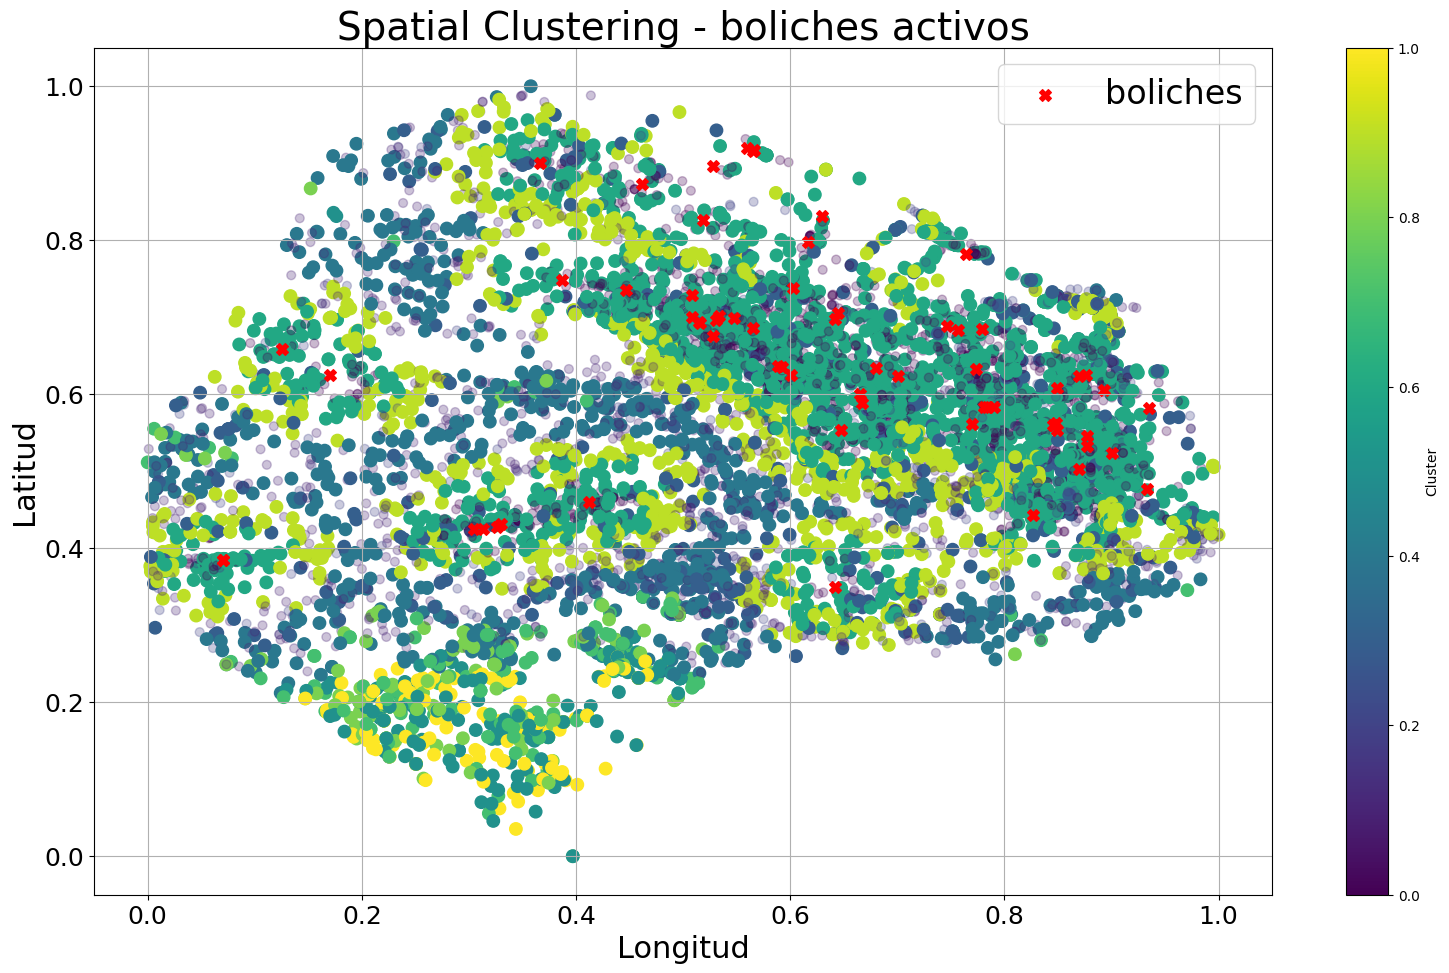

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

coords = filtered_df[['number__latitud', 'number__longitud']].to_numpy()

attributes = filtered_df.drop(['number__latitud', 'number__longitud'],axis=1).to_numpy()
attributes = StandardScaler().fit_transform(attributes)

features = np.hstack((coords, attributes))

n_clusters = 11 # Adjust this to the desired number of clusters

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
filtered_df['cluster'] = kmeans.fit_predict(features)

marker_size = np.where(filtered_df['cluster'] > 2.5, 80, 40)  # Larger size for values above 2.5
alpha_value = np.where(filtered_df['cluster'] > 2.5, 1, 0.28)  # Faded markers for values below 2.5

# Create a scatter plot
fig, ax = plt.subplots(figsize=(19, 11))
scatter = ax.scatter(
    filtered_df['number__longitud'],  # Longitude on the x-axis
    filtered_df['number__latitud'],   # Latitude on the y-axis
    c=filtered_df['cluster'],         # Color by cluster label
    cmap='viridis',                   # Color map
    s=marker_size,                    # Marker size based on condition
    alpha=alpha_value                   # Marker size
)

scatter = ax.scatter(
    boliches['Longitud'],  # Longitude on the x-axis
    boliches['Latitud'],   # Latitude on the y-axis
    c='red',         # Color by cluster label
    marker='X',                   # Color map
    s=70,
    label='boliches'
)


# Set plot title and axis labels
ax.set_title('Spatial Clustering - boliches activos',fontsize=28)
ax.set_xlabel('Longitud',fontsize=22)
ax.set_ylabel('Latitud',fontsize=22)

# Set axis limits for longitude and latitude
#ax.set_xlim(0.46, 0.66)  # Longitude limits
#ax.set_ylim(0.6, 1.04)   # Latitude limits
ax.tick_params(axis='both', labelsize=18)
# Show the color bar for clusters
plt.colorbar(scatter, label='Cluster')
ax.legend(fontsize=24)
# Display grid
ax.grid()

# Show plot
plt.show()

In [27]:
filtered_df = filtered_df.reset_index(drop=True)
back = back.reset_index(drop=True)
filtered_df['distancia_kms'] = back['distance_km']

filtered_df

,category__dia_DOM,category__dia_SAB,category__uso_arma_NO,category__uso_arma_SI,number__latitud,number__longitud,number__distance_km,cluster,distancia_kms
0,0.0,1.0,0.0,1.0,0.713333,0.866542,0.175332,3,1.353616
1,0.0,1.0,1.0,0.0,0.727344,0.849760,0.161472,9,1.246719
2,0.0,1.0,0.0,1.0,0.727344,0.849760,0.161472,3,1.246719
3,0.0,1.0,0.0,1.0,0.710441,0.869847,0.179395,3,1.384947
4,0.0,1.0,1.0,0.0,0.705237,0.866073,0.168184,9,1.298481
...,...,...,...,...,...,...,...,...,...
8663,1.0,0.0,1.0,0.0,0.688118,0.318221,0.214417,1,1.655048
8664,0.0,1.0,1.0,0.0,0.642665,0.577092,0.040686,0,0.315168
8665,1.0,0.0,1.0,0.0,0.710767,0.487724,0.060877,6,0.470891
8666,1.0,0.0,1.0,0.0,0.643487,0.510998,0.095454,6,0.737560


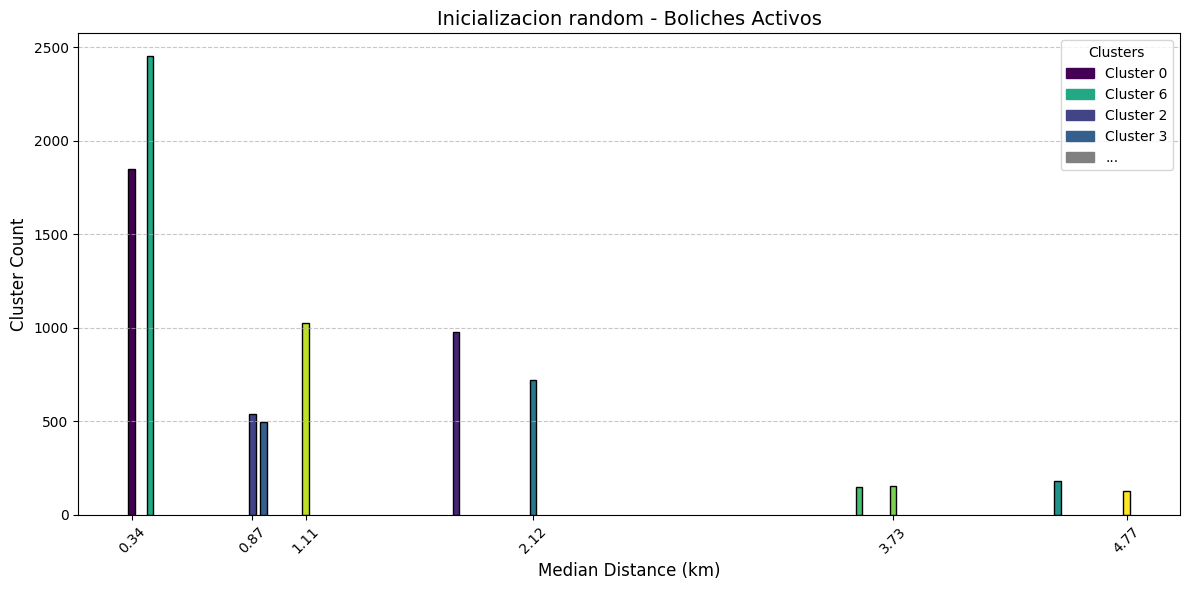

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

# Example DataFrame (replace with your actual `filtered_df`)
# filtered_df = pd.DataFrame({...})

# Number of clusters

# Create a colormap from 'viridis' (same as in the scatter plot)
cmap = plt.get_cmap('viridis')

# Normalize cluster labels to get appropriate colors from the colormap
norm = plt.Normalize(vmin=0, vmax=n_clusters - 1)

# Calculate median distances and cluster counts
median_distances = filtered_df.groupby('cluster')['distancia_kms'].median()  # Median distance per cluster
cluster_counts = filtered_df['cluster'].value_counts()  # Cluster counts

# Combine data into a DataFrame for plotting
cluster_data = pd.DataFrame({
    'median_distance': median_distances,
    'count': cluster_counts
}).sort_values(by='median_distance')  # Sort by median distances for a logical x-axis order

# Create the bar plot
plt.figure(figsize=(12, 6))

# Set bar width
bar_width = 0.03  # Adjust this value for smaller bars

# Plot bars with median_distance on the x-axis and count on the y-axis
bars = plt.bar(
    cluster_data['median_distance'],  # Median distances
    cluster_data['count'],  # Counts
    color=cmap(norm(cluster_data.index)),  # Colors from colormap
    edgecolor='black',
    width=bar_width  # Adjusted bar width
)

# Select first 4 clusters and add '...'
legend_labels = [f"Cluster {int(cluster)}" for cluster in cluster_data.index[:4]] + ["..."]
legend_colors = [cmap(norm(cluster)) for cluster in cluster_data.index[:4]] + ["gray"]  # Add gray for '...'

# Create legend using Patches
legend_patches = [
    Patch(color=color, label=label) for label, color in zip(legend_labels, legend_colors)
]

plt.legend(handles=legend_patches, title="Clusters", loc="upper right", fontsize=10)

# Set title and labels
plt.title('Inicializacion random - Boliches Activos', fontsize=14)
plt.xlabel('Median Distance (km)', fontsize=12)
plt.ylabel('Cluster Count', fontsize=12)

# Skip some of the x-axis labels for better readability
tick_step = 2  # Adjust this value to control the frequency of the labels
xticks_to_display = cluster_data['median_distance'][::tick_step]  # Select every 'tick_step'-th value for x-ticks
xticks_labels = [f"{x:.2f}" for x in xticks_to_display]

plt.xticks(ticks=xticks_to_display, labels=xticks_labels, rotation=45)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Ensure labels fit properly
plt.show()


In [29]:
filtered_df = filtered_df.reset_index(drop=True)
back = back.reset_index(drop=True)
filtered_df['distancia_kms'] = back['distance_km']
filtered_df=filtered_df.drop(['distancia_kms','cluster'],axis=1)
filtered_df

,category__dia_DOM,category__dia_SAB,category__uso_arma_NO,category__uso_arma_SI,number__latitud,number__longitud,number__distance_km
0,0.0,1.0,0.0,1.0,0.713333,0.866542,0.175332
1,0.0,1.0,1.0,0.0,0.727344,0.849760,0.161472
2,0.0,1.0,0.0,1.0,0.727344,0.849760,0.161472
3,0.0,1.0,0.0,1.0,0.710441,0.869847,0.179395
4,0.0,1.0,1.0,0.0,0.705237,0.866073,0.168184
...,...,...,...,...,...,...,...
8663,1.0,0.0,1.0,0.0,0.688118,0.318221,0.214417
8664,0.0,1.0,1.0,0.0,0.642665,0.577092,0.040686
8665,1.0,0.0,1.0,0.0,0.710767,0.487724,0.060877
8666,1.0,0.0,1.0,0.0,0.643487,0.510998,0.095454


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


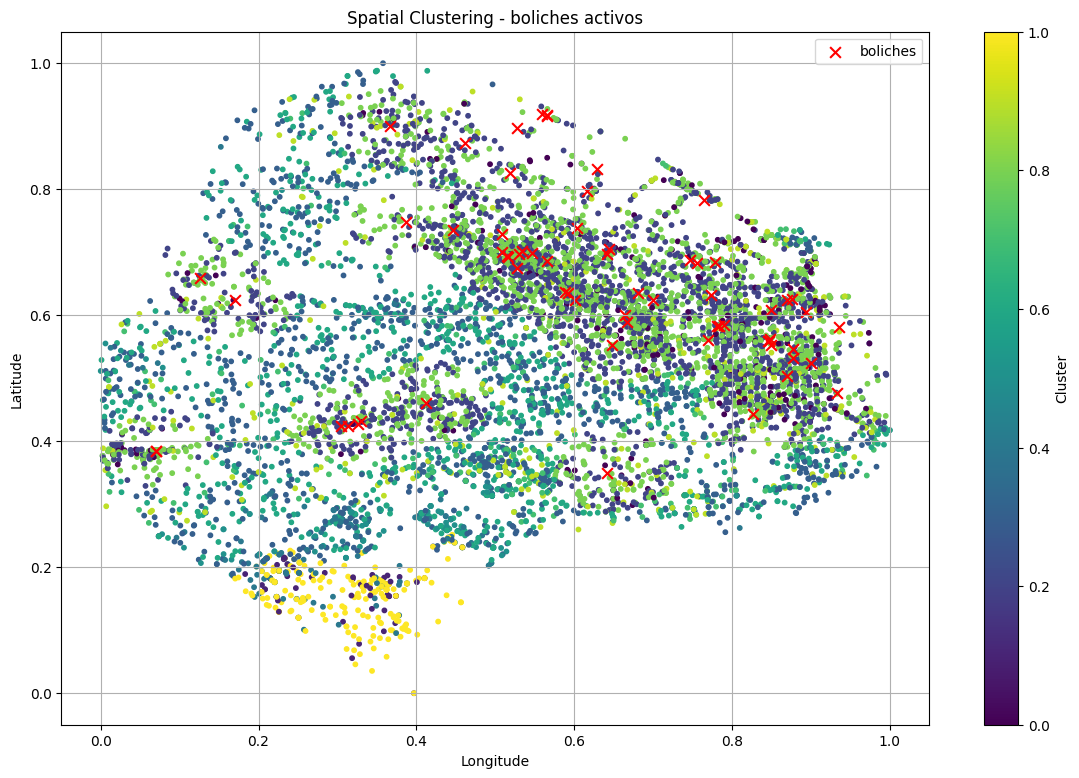

In [30]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assume filtered_df is your DataFrame
# Define the number of clusters

# Extract coordinates and attributes from the DataFrame
coords = filtered_df[['number__latitud', 'number__longitud']].to_numpy()
attributes = filtered_df.drop(['number__latitud', 'number__longitud'],axis=1).to_numpy()

# Standardize the attributes (other than Latitud and Longitud)
attributes = StandardScaler().fit_transform(attributes)

# Combine the coordinates and attributes into the features
features = np.hstack((coords, attributes))

# Create initial centroids based on 'Latitud' and 'Longitud'
initial_centroids = []

for _ in range(n_clusters):
    # Randomly pick Latitud and Longitud from the dataset
    lat_long = boliches[['Latitud', 'Longitud']].sample(1).values[0]

    # Fill the remaining features with small random values close to 0 (e.g., normally distributed values around 0)
    remaining_features = np.random.normal(0.5, 0.6, features.shape[1] - 2)  # Use features.shape[1] to get the number of columns

    # Combine the two arrays (Latitud, Longitud) with the other features
    centroid = np.concatenate([lat_long, remaining_features])

    # Add the centroid to the list
    initial_centroids.append(centroid)

# Convert the list of centroids to a numpy array
initial_centroids = np.array(initial_centroids)

# Initialize KMeans with the desired number of clusters and initial centroids
kmeans_init = KMeans(n_clusters=n_clusters, init=initial_centroids, n_init=5, random_state=42)

# Fit the model and assign the clusters to the DataFrame
filtered_df['cluster'] = kmeans_init.fit_predict(features)

# Create a scatter plot
fig, ax = plt.subplots(figsize=(14, 9))
scatter = ax.scatter(
    filtered_df['number__longitud'],  # Longitude on the x-axis
    filtered_df['number__latitud'],   # Latitude on the y-axis
    c=filtered_df['cluster'],         # Color by cluster label
    cmap='viridis',                   # Color map
    s=10                              # Marker size
)

scatter = ax.scatter(
    boliches['Longitud'],  # Longitude on the x-axis
    boliches['Latitud'],   # Latitude on the y-axis
    c='red',         # Color by cluster label
    marker='x',                   # Color map
    s=60,
    label='boliches'
)

# Set plot title and axis labels
ax.set_title('Spatial Clustering - boliches activos')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set axis limits for longitude and latitude
#ax.set_xlim(0.46, 0.66)  # Longitude limits
#ax.set_ylim(0.6, 1.04)   # Latitude limits

# Show the color bar for clusters
plt.colorbar(scatter, label='Cluster')
ax.legend()
# Display grid
ax.grid()

# Show plot
plt.show()

In [31]:
np.unique(filtered_df['cluster'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [32]:
print(filtered_df['cluster'].value_counts())

cluster
8     2540
2     2532
3     1102
6      934
9      494
0      326
7      221
10     221
4      153
5       88
1       57
Name: count, dtype: int64


In [33]:
res_robo

,dia,uso_arma,latitud,longitud,distance_km
1198,SAB,SI,-34.584082,-58.378318,1.353616
1200,SAB,NO,-34.581731,-58.381263,1.246719
1205,SAB,SI,-34.581731,-58.381263,1.246719
1208,SAB,SI,-34.584568,-58.377738,1.384947
1215,SAB,NO,-34.585441,-58.378401,1.298481
...,...,...,...,...,...
62134,DOM,NO,-34.588314,-58.474530,1.655048
62136,SAB,NO,-34.595942,-58.429107,0.315168
62154,DOM,NO,-34.584513,-58.444788,0.470891
62162,DOM,NO,-34.595804,-58.440704,0.737560


In [34]:
filtered_df = filtered_df.reset_index(drop=True)
back = back.reset_index(drop=True)
filtered_df['distancia_kms'] = back['distance_km']

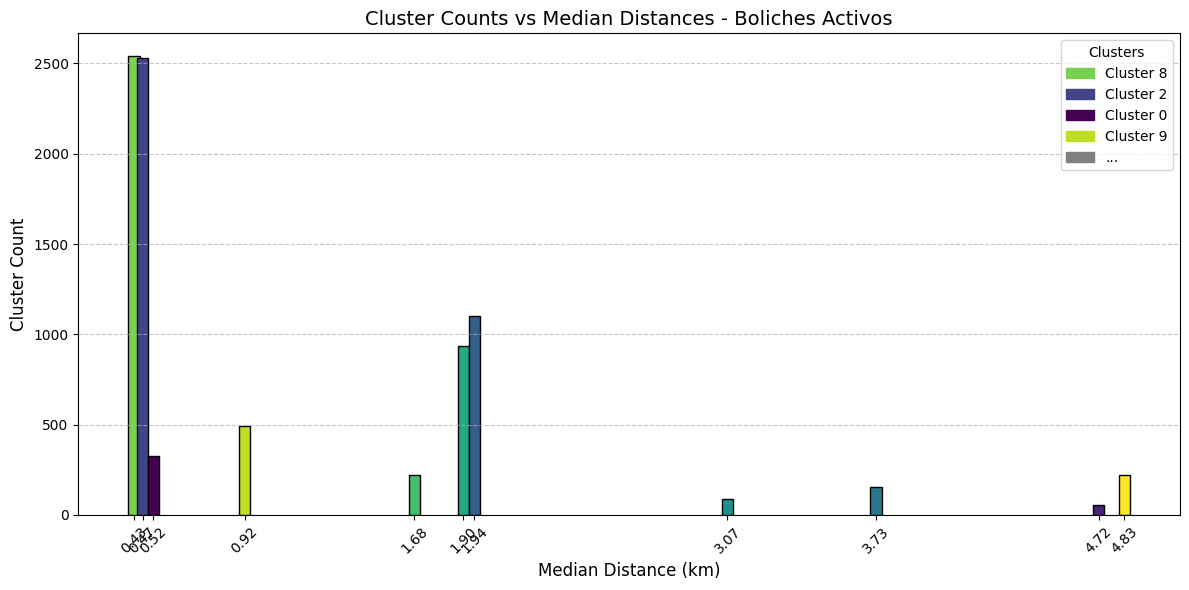

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

# Example DataFrame (replace with your actual `filtered_df`)
# filtered_df = pd.DataFrame({...})

# Number of clusters
n_clusters = filtered_df['cluster'].nunique()

# Create a colormap from 'viridis' (same as in the scatter plot)
cmap = plt.get_cmap('viridis')

# Normalize cluster labels to get appropriate colors from the colormap
norm = plt.Normalize(vmin=0, vmax=n_clusters - 1)

# Calculate median distances and cluster counts
median_distances = filtered_df.groupby('cluster')['distancia_kms'].median()  # Median distance per cluster
cluster_counts = filtered_df['cluster'].value_counts()  # Cluster counts

# Combine data into a DataFrame for plotting
cluster_data = pd.DataFrame({
    'median_distance': median_distances,
    'count': cluster_counts
}).sort_values(by='median_distance')  # Sort by median distances for a logical x-axis order

# Create the bar plot
plt.figure(figsize=(12, 6))

# Set bar width
bar_width = 0.05  # Adjust this value for smaller bars

# Plot bars with median_distance on the x-axis and count on the y-axis
bars = plt.bar(
    cluster_data['median_distance'],  # Median distances
    cluster_data['count'],  # Counts
    color=cmap(norm(cluster_data.index)),  # Colors from colormap
    edgecolor='black',
    width=bar_width  # Adjusted bar width
)

# Select first 4 clusters and add '...'
legend_labels = [f"Cluster {int(cluster)}" for cluster in cluster_data.index[:4]] + ["..."]
legend_colors = [cmap(norm(cluster)) for cluster in cluster_data.index[:4]] + ["gray"]  # Add gray for '...'

# Create legend using Patches
legend_patches = [
    Patch(color=color, label=label) for label, color in zip(legend_labels, legend_colors)
]

plt.legend(handles=legend_patches, title="Clusters", loc="upper right", fontsize=10)

# Set title and labels
plt.title('Cluster Counts vs Median Distances - Boliches Activos', fontsize=14)
plt.xlabel('Median Distance (km)', fontsize=12)
plt.ylabel('Cluster Count', fontsize=12)

# Adjust x-axis for better spacing
plt.xticks(ticks=cluster_data['median_distance'], labels=[f"{x:.2f}" for x in cluster_data['median_distance']], rotation=45)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Ensure labels fit properly
plt.show()

In [36]:
filtered_df=filtered_df.drop(['cluster'],axis=1)

In [37]:
scaler = MinMaxScaler()

filtered_df['distancia_kms'] = scaler.fit_transform(filtered_df['distancia_kms'].values.reshape(-1, 1))
filtered_df.head()


,category__dia_DOM,category__dia_SAB,category__uso_arma_NO,category__uso_arma_SI,number__latitud,number__longitud,number__distance_km,distancia_kms
0,0.0,1.0,0.0,1.0,0.713333,0.866542,0.175332,0.175332
1,0.0,1.0,1.0,0.0,0.727344,0.849760,0.161472,0.161472
2,0.0,1.0,0.0,1.0,0.727344,0.849760,0.161472,0.161472
3,0.0,1.0,0.0,1.0,0.710441,0.869847,0.179395,0.179395
4,0.0,1.0,1.0,0.0,0.705237,0.866073,0.168184,0.168184


In [38]:
filtered_df.head()

,category__dia_DOM,category__dia_SAB,category__uso_arma_NO,category__uso_arma_SI,number__latitud,number__longitud,number__distance_km,distancia_kms
0,0.0,1.0,0.0,1.0,0.713333,0.866542,0.175332,0.175332
1,0.0,1.0,1.0,0.0,0.727344,0.849760,0.161472,0.161472
2,0.0,1.0,0.0,1.0,0.727344,0.849760,0.161472,0.161472
3,0.0,1.0,0.0,1.0,0.710441,0.869847,0.179395,0.179395
4,0.0,1.0,1.0,0.0,0.705237,0.866073,0.168184,0.168184


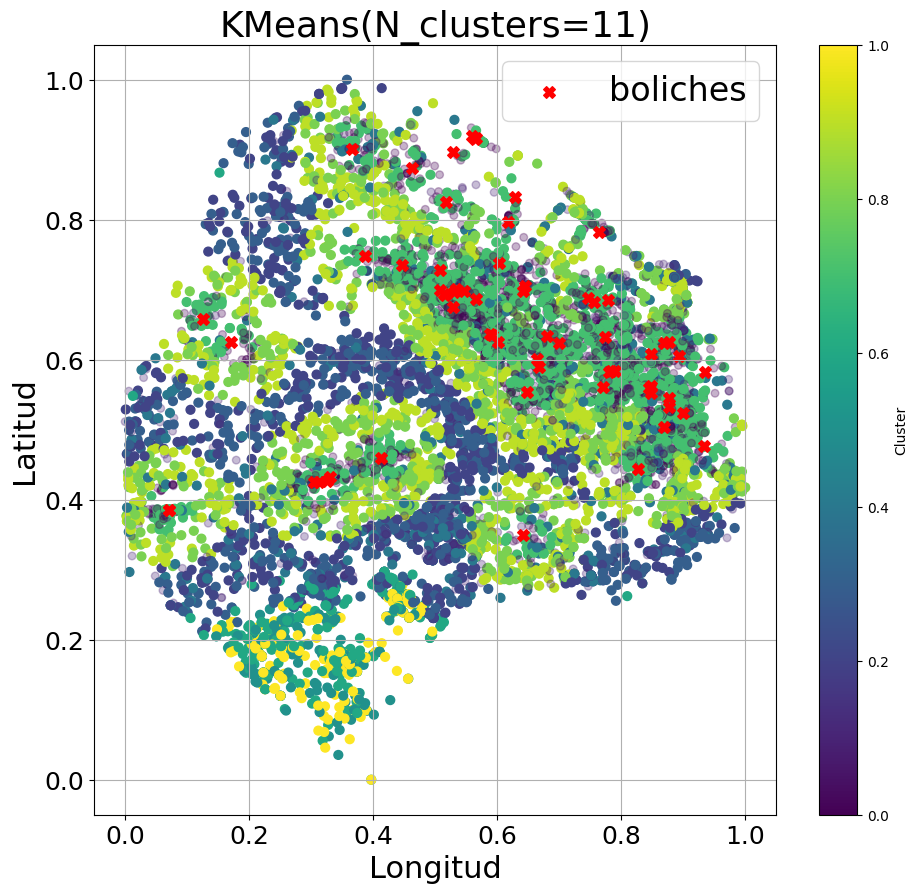

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

coords = filtered_df[['number__latitud', 'number__longitud']].to_numpy()

attributes = filtered_df.drop(['number__latitud', 'number__longitud'],axis=1).to_numpy()
attributes = StandardScaler().fit_transform(attributes)

# Combine spatial and non-spatial features

features = np.hstack((coords, attributes))

n_clusters=11

# Perform KMeans clustering
kmeans_dist = KMeans(n_clusters=n_clusters, random_state=42)
filtered_df['cluster'] = kmeans_dist.fit_predict(features)
marker_size = np.where(filtered_df['cluster'] > 1, 40, 30)  # Larger size for values above 2.5
alpha_value = np.where(filtered_df['cluster'] > 1, 1, 0.3)  # Faded markers for values below 2.5
# Create a scatter plot
fig, ax = plt.subplots(figsize=(11, 10))
scatter = ax.scatter(
    filtered_df['number__longitud'],  # Longitude on the x-axis
    filtered_df['number__latitud'],   # Latitude on the y-axis
    c=filtered_df['cluster'],         # Color by cluster label
    cmap='viridis',                   # Color map                 # Color map
    s=marker_size,                    # Marker size based on condition
    alpha=alpha_value                   # Marker size                              # Marker size
)

scatter = ax.scatter(
    boliches['Longitud'],  # Longitude on the x-axis
    boliches['Latitud'],   # Latitude on the y-axis
    c='red',         # Color by cluster label
    marker='X',                   # Color map
    s=70,
    label='boliches'
)

# Set plot title and axis labels
ax.set_title('KMeans'+f'(N_clusters={n_clusters})',fontsize=26)
ax.set_xlabel('Longitud',fontsize=22)
ax.set_ylabel('Latitud',fontsize=22)

# Set axis limits for longitude and latitude

ax.tick_params(axis='both', labelsize=18)

# Show the color bar for clusters
plt.colorbar(scatter, label='Cluster')

ax.legend(fontsize=24)
# Display grid
ax.grid()
# Show plot
plt.show()

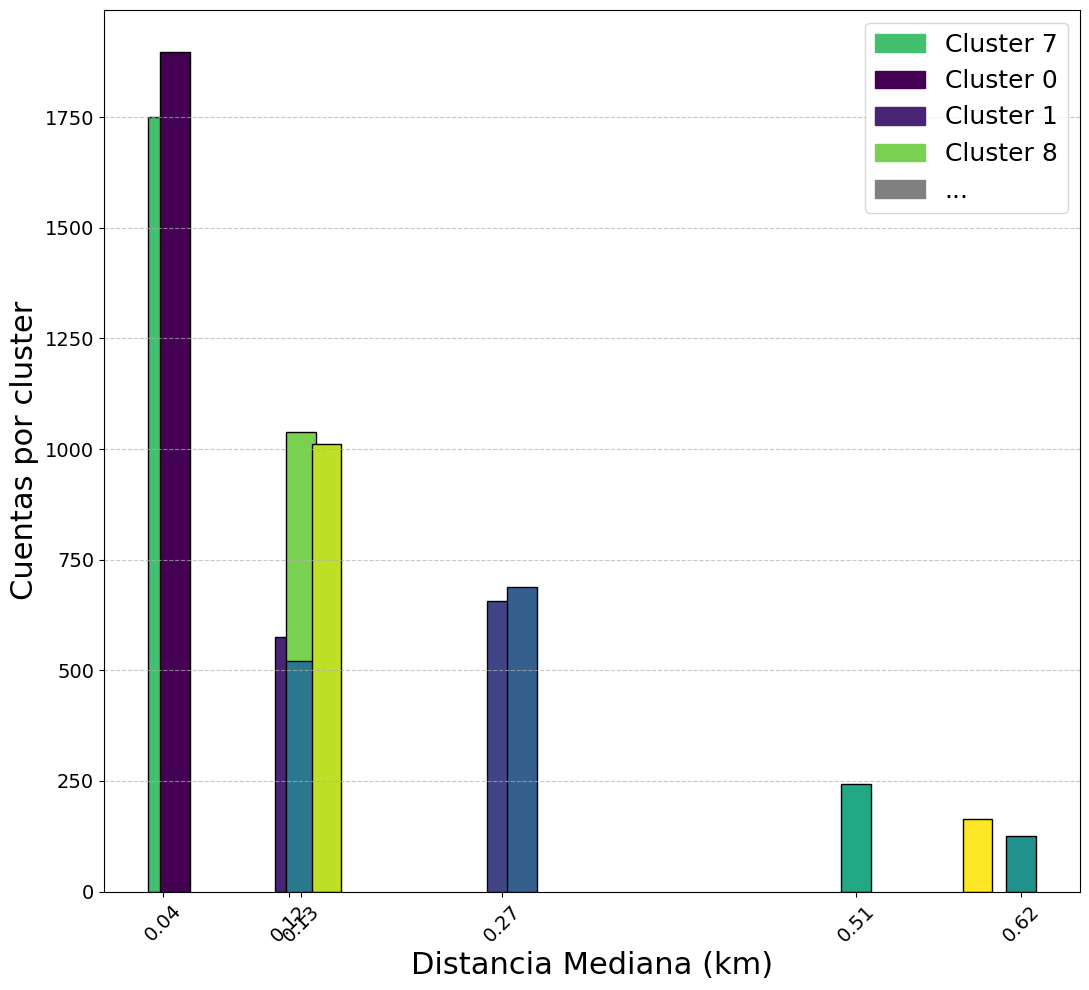

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example DataFrame (replace with your actual `filtered_df`)
# filtered_df = pd.DataFrame({...})

# Number of clusters
n_clusters = filtered_df['cluster'].nunique()

# Create a colormap from 'viridis' (same as in the scatter plot)
cmap = plt.get_cmap('viridis')

# Normalize cluster labels to get appropriate colors from the colormap
norm = plt.Normalize(vmin=0, vmax=n_clusters - 1)

# Calculate mean distances and cluster counts
mean_distances = filtered_df.groupby('cluster')['distancia_kms'].median()  # Mean distance per cluster
cluster_counts = filtered_df['cluster'].value_counts()  # Cluster counts

# Combine data into a DataFrame for plotting
cluster_data = pd.DataFrame({
    'median_distance': mean_distances,
    'count': cluster_counts
}).sort_values(by='median_distance')  # Sort by mean distances for a logical x-axis order

# Create the bar plot
plt.figure(figsize=(11, 10))

# Set bar width
bar_width = 0.02  # Adjust this value for smaller bars

# Plot bars with mean_distance on the x-axis and count on the y-axis
bars = plt.bar(
    cluster_data['median_distance'],  # Mean distances
    cluster_data['count'],  # Counts
    color=cmap(norm(cluster_data.index)),  # Colors from colormap
    edgecolor='black',
    width=bar_width  # Adjusted bar width
)

# Select first 4 clusters and add '...'
legend_labels = [f"Cluster {int(cluster)}" for cluster in cluster_data.index[:4]] + ["..."]
legend_colors = [cmap(norm(cluster)) for cluster in cluster_data.index[:4]] + ["gray"]  # Add gray for '...'

# Create legend using Patches
legend_patches = [
    Patch(color=color, label=label) for label, color in zip(legend_labels, legend_colors)
]

plt.legend(handles=legend_patches, loc="upper right", fontsize=18)

ax.tick_params(axis='both', labelsize=18)

# Skip some of the x-axis labels for better readability
tick_step = 2  # Adjust this value to control the frequency of the labels
xticks_to_display = cluster_data['median_distance'][::tick_step]  # Select every 'tick_step'-th value for x-ticks
xticks_labels = [f"{x:.2f}" for x in xticks_to_display]

plt.xticks(ticks=xticks_to_display, labels=xticks_labels, rotation=45,fontsize=14)

plt.yticks(fontsize=14)

# Set title and labels

plt.xlabel('Distancia Mediana (km)', fontsize=22)
plt.ylabel('Cuentas por cluster', fontsize=22)

# Adjust x-axis for better spacing
#plt.xticks(ticks=cluster_data['median_distance'], labels=[f"{x:.2f}" for x in cluster_data['median_distance']], rotation=45)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot

plt.tight_layout()  # Ensure labels fit properly
plt.show()